# Assignment 4 - Digital signal processing and analysis

Course "Data processing and Visualization", IE500417, NTNU.

https://www.ntnu.edu/studies/courses/IE500417

**Note (as usual): plagiarism is strictly forbidden! You should never copy any source code from other students. If you use any code written by others (except the standards libraries: NumPy, SciPy, Pandas, etc), provide a reference.**

**If the teachers see that your work is mostly copy+paste from online code snippets, the grade can be reduced.**

**If a case of plagiarism is detected, it will be reported to the administration.**

## Task description

In this assignment, you will practice digital signal processing (in a rather basic form, there will be no advanced DSP methods). You will work with two signals
simultaneously. As it sometimes happens, the two signals are not synchronized: they are sampled at
different time moments and with different sampling rate. You will have to resample and synchronize
them so that both signals have the same sample timestamps. You will do some analysis of the signals
and visualize them using line charts.

## Submission details (as usual)

The assignment must be handed in on Blackboard. The following must be handed in:
1. Report in PDF or HTML format describing the results of this assignment. Preferably, it is generated from the Jupyter notebook you used (Hint: In Jupyter: File > Download as > HTML). Alternatively (if you use plain Python or other tools), prepare a readable report that contains figures and source code snippets necessary to understand your work.
2. Source code that you used to generate the results. This could be the the Jupyter notebook file, python source files, Matlab files, etc.

Deadlines and grading information on Blackboard.

## Part 1: Understanding the signals (25%)

**Step 1.1: Load the two signals from CSV files: s1.csv and s2.csv.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

signal1=pd.read_csv('s1.csv',index_col=0,parse_dates=[0],infer_datetime_format=True)
signal2=pd.read_csv('s2.csv',index_col=0,parse_dates=[0],infer_datetime_format=True)

**Step 1.2: Do a quick analysis of what data you got: column names of each signal and number of rows.**

In [2]:
print('Signal 1| column names: {}\tnumber of samples: {}'.format(signal1.columns.values,len(signal1)))
print('Signal 2| column names: {}\tnumber of samples: {}'.format(signal2.columns.values,len(signal2)))

Signal 1| column names: ['s1']	number of samples: 10000
Signal 2| column names: ['s2']	number of samples: 810


**Step 1.3: One of the signals is sampled at even frequency, another is not. Find out which is the nonuniformly
sampled signal. Store it in variable `signal_x`. Store the the uniformly sampled signal in variable `signal_u`.**

Note: "find out" here means **"write code that finds out"**. If you will manually assign the `signal_u` and `signal_x` variables, you won't get points for this step. The reason - manual assignment is not flexible. If the dataset changes, your remaining notebook calculations will be wrong suddenly. Flexible code that finds the necessary signals would work even if we would swap the s1.csv and s2.csv files.

In [3]:
def even_sampling(signal):
    diff=signal[1]-signal[0]
    for i in range(1,len(signal)-1):
        if diff != signal[i+1]-signal[i]:
            return False
    return True

signal_x=None
signal_u=None

if even_sampling(signal1.index):
    signal_u=signal1
    signal_x=signal2
else:
    signal_u=signal2
    signal_x=signal1

**Step 1.4. Plot the two signals in a line chart:**

* Both lines in a single chart
* Add a legend with label for each signal
* Signal U should be Green dashed line with line width=2
* Signal X should be Blue solid line with line width=1.
* Chart should have a title, font size = 20

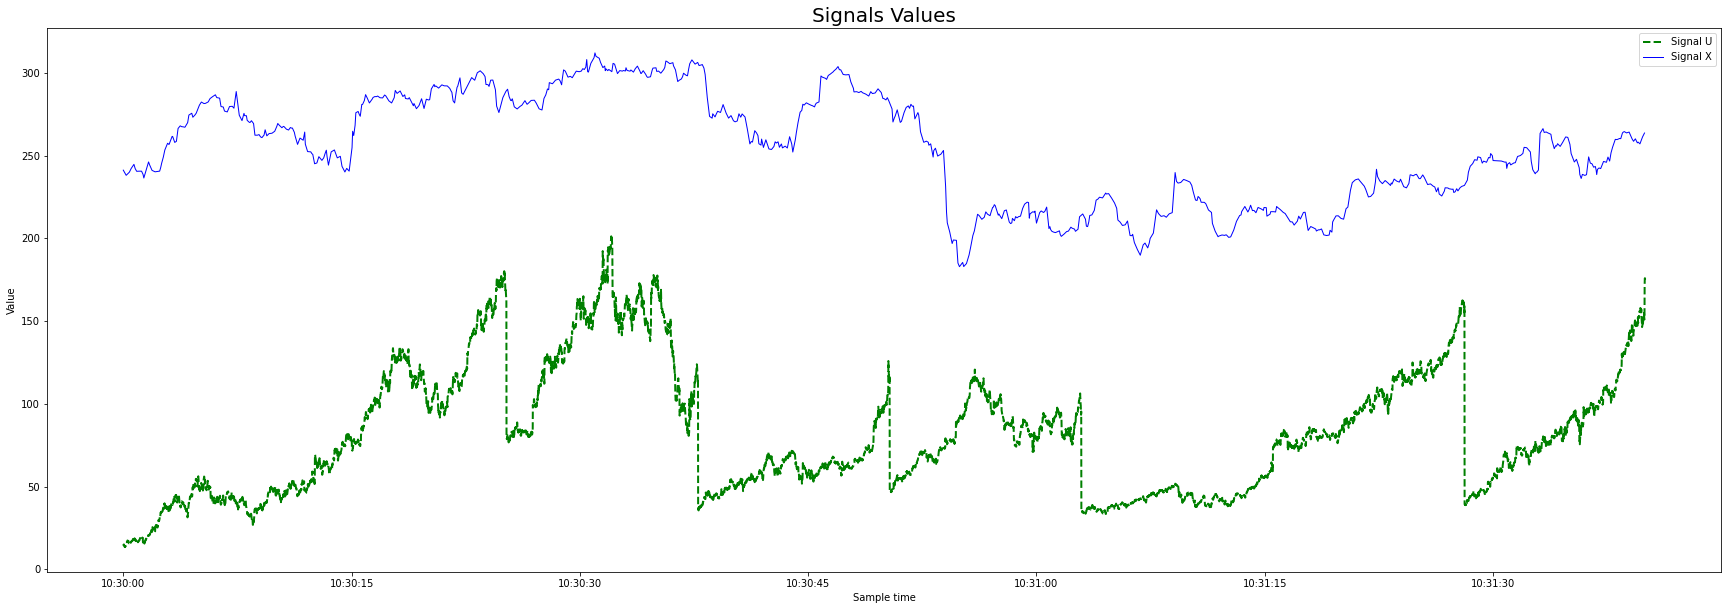

In [4]:
plt.figure(figsize=(30,10))
plt.plot(signal_u.index,signal_u.s1,'g--',linewidth=2, label='Signal U')
plt.plot(signal_x.index,signal_x.s2,'b-',linewidth=1, label='Signal X')
plt.xlabel('Sample time')
plt.ylabel('Value')
plt.legend()
plt.title('Signals Values',fontsize=20)
plt.show()

**Step 1.5: Find out the sampling frequency of Signal U, save it in variable `f_u`.**

In [5]:
inter=signal_u.index[1]-signal_u.index[0]
f_u=1/inter.total_seconds()
f_u

100.0

**Step 1.6: Find out which are the highest frequencies used in Signal U. Save the highest frequency in variable `b_u`, having Hz as units.**

Hint: use Fourier transform, and find max frequency having a significant amplitude. There may be many frequencies with tiny amplitudes. Use some threshold to filter these out.

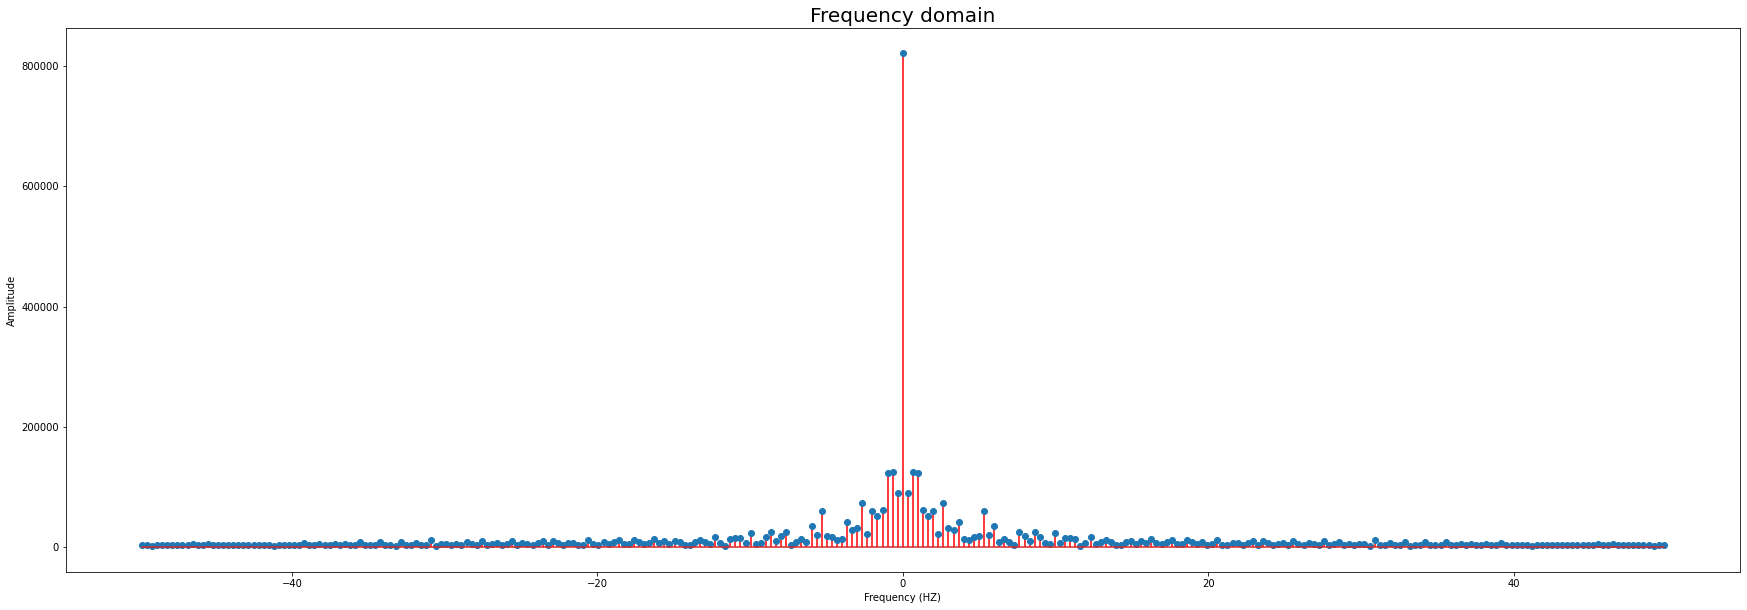

49.83388704318937

In [6]:
fft_s1=np.fft.fft(signal_u.s1)
fft_s1_filterd=fft_s1[np.abs(fft_s1)>2500]
freq=np.fft.fftfreq(len(fft_s1_filterd))*f_u

plt.figure(figsize=(30,10))
plt.stem(freq, np.abs(fft_s1_filterd),'r')
plt.xlabel('Frequency (HZ)')
plt.ylabel('Amplitude')
plt.title('Frequency domain',fontsize=20)
plt.show()

b_u=freq.max()
b_u

**Step 1.7: Find out the minimum frequency at which Signal U should have been sampled to still contain all the information in the signal. Save it in variable `fs_u`.**

Hint: Nyquist-Shannon theorem

In [7]:
fs_u=b_u*2
fs_u

99.66777408637874

**Step 1.8: Calculate, how many % of space is wasted by storing too many samples for Signal U. I.e., if we would resample in the Signal U at a sampling rate `fs_u`, how many samples would we store, and how much that is in relation to the number of samples in the CSV file?**

**If it is 0, why?**

P.S. Don't worry about Signal X – the sampling system for it was designed by careless engineers who did not know about Nyquist-Shannon's sampling theorem. Therefore, the sampling of Signal X is not proper. But we work with what we have.

In [8]:
signal_samples=len(signal_u)
signal_samples_filtered=len(signal_u)*1/f_u*fs_u
wasted_space=100-signal_samples_filtered/signal_samples*100
wasted_space

0.332225913621258

**COMMENT**

If we used proper frequency we could save up to 0.33% of space.

## Part 2: Synchronizing the signals – resampling (25%)

Note: whenever you modify something for the signals, it is suggested to store the modifierd signal in another variable. Keep the original one intact. You may later want to compare the two. 

**Step 2.1: Decimate (down-sample) the Signal U to 10Hz, store it in variable `su_resampled`:**

In [9]:
su_resampled=signal.resample(signal_u.s1,int(len(signal_u)/(f_u/10)),t=signal_u.index)
su_resampled=pd.DataFrame(su_resampled)
su_resampled=su_resampled.transpose()
su_resampled=su_resampled[[1,0]]
su_resampled=su_resampled.rename(columns={1:'time',0:'s1'})
su_resampled.set_index('time',inplace=True)
su_resampled

,s1
time,
2017-08-29 10:30:00.000,84.916675
2017-08-29 10:30:00.100,0.18451
2017-08-29 10:30:00.200,22.706012
2017-08-29 10:30:00.300,12.151147
2017-08-29 10:30:00.400,19.74683
...,...
2017-08-29 10:31:39.500,152.423106
2017-08-29 10:31:39.600,149.991113
2017-08-29 10:31:39.700,161.480336


**Step 2.2: Explain - why is the resampled signal not containing the same information as the original signal (i.e., what information is lost?)**

**ANSWEAR**

It is not the same because we lost information about the prats wich had frequencies higher then 5HZ.

From now on, in all the places whare you need to do something with Signal U, **use the resampled version: `su_resampled`.**

**Step 2.3: Synchronize Signal X with Signal U, store it in variable `sx_resampled`. I.e., if `su_resampled` is sampled at time moments t0, t1, …, tN, then resample Signal X at the same time moments: t0, t1, …, tN. This may involve several steps, 
depending on what functions/libraries you use.**

Hint: see `07-2-Resampling.ipynb` example notebook on Blackboard ().

Hint: your resulting `sx_resampled` should be 10Hz signal, not 100Hz.

In [10]:
val100HZ=signal_x.s2.resample('10ms').asfreq()
val100HZ_m=val100HZ*100
spline_cubic=val100HZ_m.interpolate(method='spline',order=2)/100
sx_resampled=pd.DataFrame(spline_cubic.resample('100ms').asfreq())
sx_resampled

,s2
time,
2017-08-29 10:30:00.000,241.170000
2017-08-29 10:30:00.100,238.888569
2017-08-29 10:30:00.200,238.016218
2017-08-29 10:30:00.300,238.551692
2017-08-29 10:30:00.400,239.950000
...,...
2017-08-29 10:31:39.500,257.794964
2017-08-29 10:31:39.600,257.421533
2017-08-29 10:31:39.700,257.645116


**Step 2.4: Check if the two signals really are synchronized – compare the timestamps, these should be
equal.**

In [11]:
if su_resampled.index.equals(sx_resampled.index): print("Time stamps are synchronized")

Time stamps are synchronized


**Step 2.5: Take both signals and insert them into a single DataFrame object (name it `composed_data`) which has:**
* Timestamps as the index column
* Two columns named `signalX` and `signalU` containing the corresponding values (`sx_resampled` and `su_resampled`).

In [12]:
composed_data=pd.merge(su_resampled, sx_resampled, left_index=True, right_index=True)
composed_data.rename(columns={'s1':'signalU','s2':'signalX'},inplace=True)
composed_data

,signalU,signalX
time,,
2017-08-29 10:30:00.000,84.916675,241.170000
2017-08-29 10:30:00.100,0.18451,238.888569
2017-08-29 10:30:00.200,22.706012,238.016218
2017-08-29 10:30:00.300,12.151147,238.551692
2017-08-29 10:30:00.400,19.74683,239.950000
...,...,...
2017-08-29 10:31:39.500,152.423106,257.794964
2017-08-29 10:31:39.600,149.991113,257.421533
2017-08-29 10:31:39.700,161.480336,257.645116


## Part 3: Find extreme values (20%)

In this part you will find extreme values in the signals. Typically, these could mean outliers, sampling errors or extreme modes of operation in the system (such as overheating of a motor).

**Step 3.1: Find Signal U values (`su_resampled`) above 170.0. Store those in variable `extreme_u_vals`.**

In [13]:
extreme_u_vals=su_resampled[su_resampled.s1 > 170]
extreme_u_vals

,s1
time,
2017-08-29 10:30:24.600,174.490064
2017-08-29 10:30:24.700,172.567052
2017-08-29 10:30:24.800,172.725318
2017-08-29 10:30:24.900,174.491553
2017-08-29 10:30:25.000,175.1926
2017-08-29 10:30:25.100,176.40224
2017-08-29 10:30:31.400,173.095045
2017-08-29 10:30:31.500,181.891165
2017-08-29 10:30:31.600,180.297236


**Step 3.2: Find Signal X values (`sx_resampled`) outside the range mean ± 2* StdDev. Store those in variable `ex_static_x_vals`.**

In [14]:
stdX=sx_resampled.s2.std()
meanX=sx_resampled.s2.mean()
ex_static_x_vals=sx_resampled[(sx_resampled.s2 < meanX-stdX*2) | (sx_resampled.s2 > meanX+stdX*2)]
ex_static_x_vals

,s2
time,
2017-08-29 10:30:54.900,182.701233
2017-08-29 10:30:55.000,183.758104
2017-08-29 10:30:55.100,185.989211
2017-08-29 10:30:55.200,183.550682
2017-08-29 10:30:55.300,182.477088
2017-08-29 10:30:55.400,184.730000
2017-08-29 10:30:55.500,187.435697


**Step 3.3: Find Signal X values (`sx_resampled`) outside an adaptive range: 3-second moving average ± 2 * StdDev. Both the average and StdDev are calculated in a 3-second rolling window. Store the values in variable `ex_dynamic_x_vals`.**

In [15]:
mov3_std=sx_resampled.s2.rolling(window=30).std()
mov3_mean=sx_resampled.s2.rolling(window=30).mean()
ex_dynamic_x_vals=sx_resampled[(sx_resampled.s2 < mov3_mean-2*mov3_std) | (sx_resampled.s2 > mov3_mean+2*mov3_std)]
ex_dynamic_x_vals

,s2
time,
2017-08-29 10:30:02.900,257.419724
2017-08-29 10:30:03.000,256.726454
2017-08-29 10:30:03.100,258.744478
2017-08-29 10:30:03.200,261.529894
2017-08-29 10:30:03.300,260.248706
...,...
2017-08-29 10:31:37.900,256.469100
2017-08-29 10:31:38.000,259.348814
2017-08-29 10:31:38.100,259.780655


## Part 4: Extra challenges (30%)

**Step 4.1: Plot a line chart with values, rolling mean, *normal boundaries* (mean +/- 2StdDev) and the extreme values `ex_dynamic_x_vals` that you calculated in Part 3.** Example:

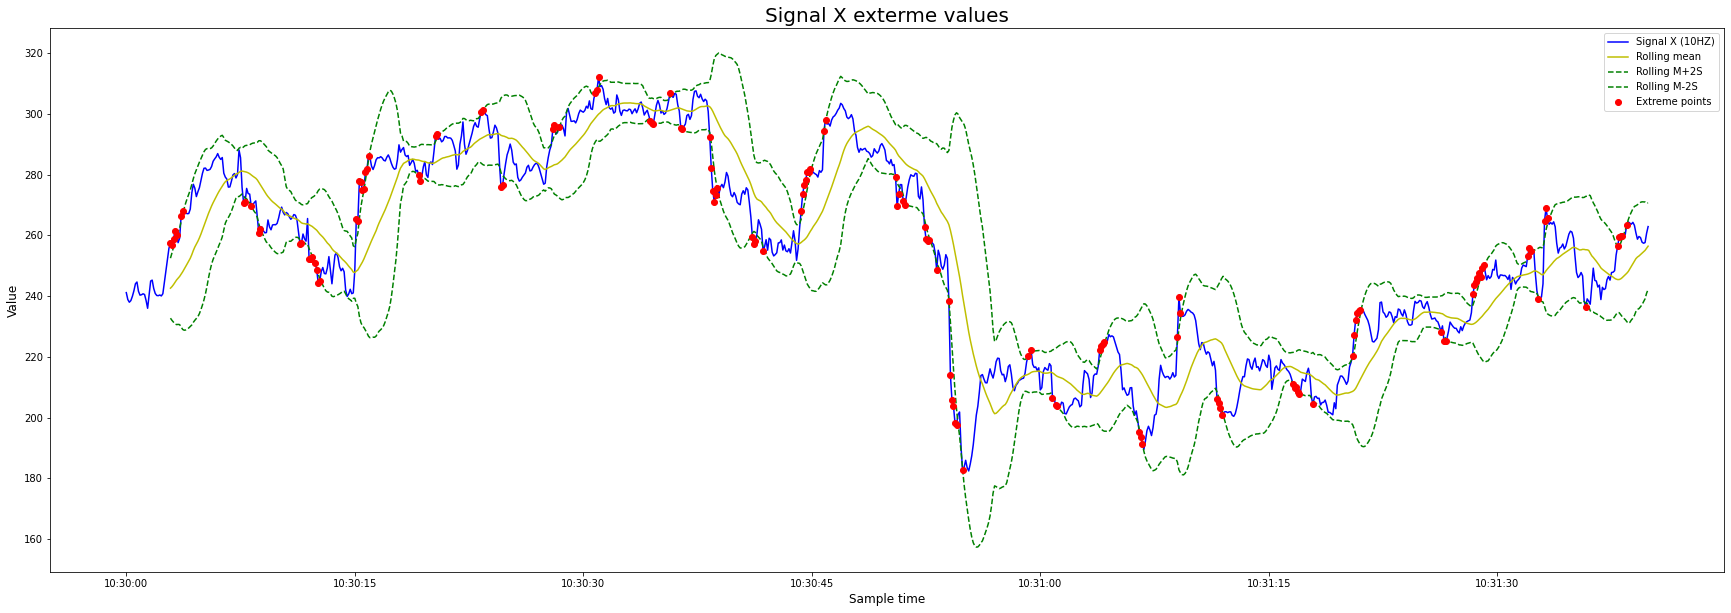

In [16]:
plt.figure(figsize=(30,10))
plt.plot(sx_resampled, 'b-', label='Signal X (10HZ)')
plt.plot(mov3_mean, 'y-', label='Rolling mean')
plt.plot(mov3_mean-2*mov3_std, 'g--', label='Rolling M+2S')
plt.plot(mov3_mean+2*mov3_std, 'g--', label='Rolling M-2S')
plt.plot(ex_dynamic_x_vals, 'ro', label='Extreme points')
plt.legend()
plt.xlabel('Sample time',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.title('Signal X exterme values',fontsize=20)
plt.show()

**Step 4.2: Find segments in Signal X (`sx_resampled`) where the 10-second moving average value is increasing for a continuous period of at least two seconds.**

In [17]:
mov10_mean=sx_resampled.s2.rolling(window=100).mean()
mov10_mean=pd.DataFrame(mov10_mean)

trend=[]
end=98
for i in range(99,len(mov10_mean)):
    if i != end+1: continue
    
    start=i
    for j in range(i,len(mov10_mean)-1):
        if mov10_mean.s2[j] < mov10_mean.s2[j+1]:
            if j+1 != len(mov10_mean)-1: continue
            else:
                end=j+1
                if end-start >= 20: trend.append(mov10_mean[start:end+1])
        else:
            end=j
            if end-start >= 20: trend.append(mov10_mean[start:end+1])
            break

df=pd.DataFrame(trend[0])
for i in range(1,len(trend)): df=pd.concat([df,pd.DataFrame(trend[i])])
df

,s2
time,
2017-08-29 10:30:09.900,263.656953
2017-08-29 10:30:10.000,263.902331
2017-08-29 10:30:10.100,264.193271
2017-08-29 10:30:10.200,264.506162
2017-08-29 10:30:10.300,264.796526
...,...
2017-08-29 10:31:39.500,251.491681
2017-08-29 10:31:39.600,251.601313
2017-08-29 10:31:39.700,251.689800


**Step 4.3: Plot a line chart and mark these regions (from previous step) in a different color.**

For example: show the normal line in blue color and the continuously increasing moving average segments in green. Example:

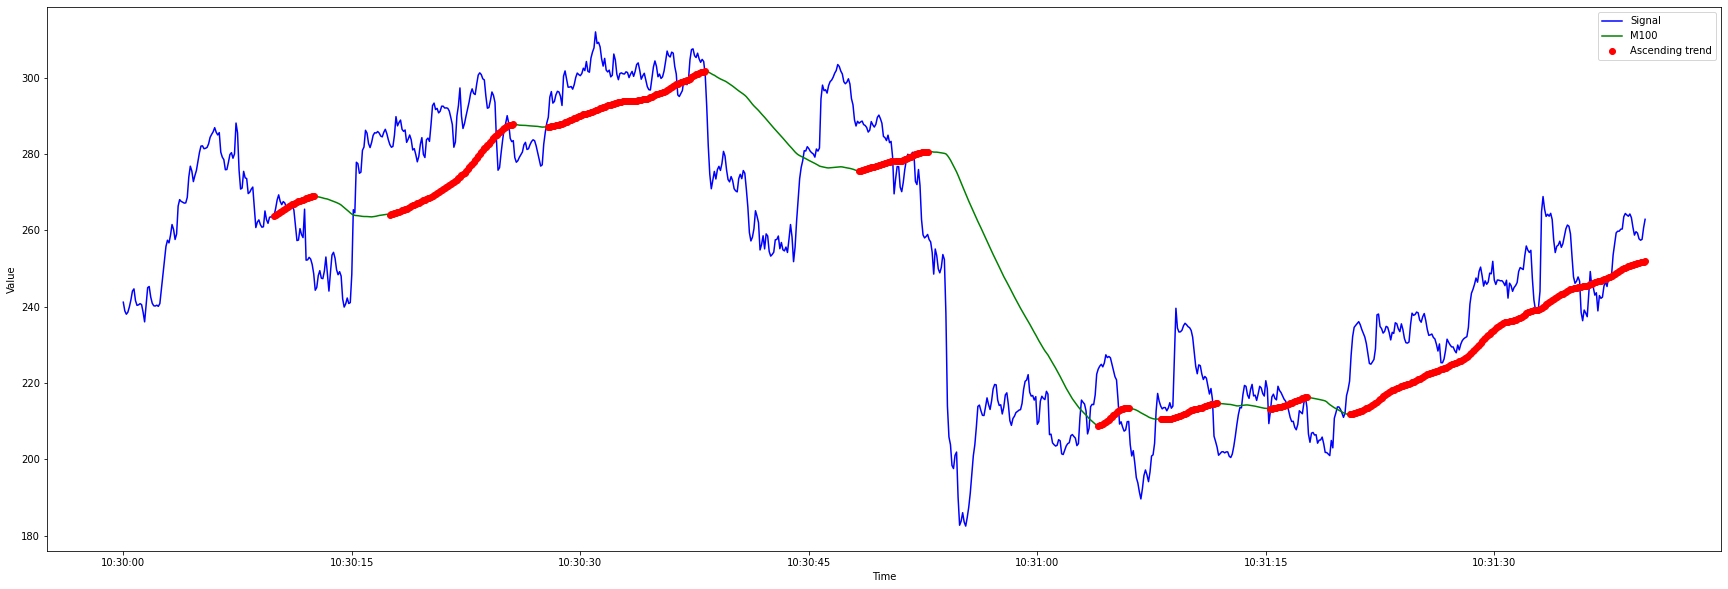

In [18]:
plt.figure(figsize=(30,10))
plt.plot(sx_resampled,'b-', label='Signal')
plt.plot(mov10_mean,'g-', label='M100')
plt.plot(df,'ro', label='Ascending trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Reflection 

Please reflect on the following questions:
1. How did the assignment go? Was it easy or hard?

It was ok but it was also the most difficoult one.

2. How many hours did you spend on it?

Around 10h

3. What was the most time-consuming part?

Understanding the concept of resampling and interpolate methods.

4. If you need to do similar things later in your professional life, how can you improve? How can you do it more efficiently?

Deffinitely do more execries like this one to get more used to the technics and theory behind this. 

5. Was tehre something you would expect to learn that this exercise did not include?

No, not necessarily.

6. Was there something that does not make sense?

No, I don't thnik so.